In [6]:
import tensorflow as tf
import numpy as np
sess=tf.Session()
x_vals=np.array([1.,3.,5.,7.,9.])
x_data=tf.placeholder(tf.float32)
m_const=tf.constant(3.)
my_product=tf.multiply(x_data,m_const)
for x_val in x_vals:
    print(sess.run(my_product,feed_dict={x_data:x_val}))

3.0
9.0
15.0
21.0
27.0


In [9]:
my_array = np.array([[1., 3., 5., 7., 9.],
                          [-2., 0., 2., 4., 6.],
                          [-6., -3., 0., 3., 6.]])
x_vals=np.array([my_array,my_array+1])
x_data=tf.placeholder(tf.float32,shape=(3,5))

In [14]:
m1=tf.constant([[1.],[0.],[-1.],[2.],[4.]])
m2=tf.constant([[2.]])
a1=tf.constant([[10.]])

In [16]:
prod1=tf.matmul(x_data,m1)
prod2=tf.matmul(prod1,m2)
add1=tf.add(prod2,a1)

In [17]:
for x_val in x_vals:
    print(sess.run(add1,feed_dict={x_data:x_val}))

[[ 102.]
 [  66.]
 [  58.]]
[[ 114.]
 [  78.]
 [  70.]]


In [19]:
x_shape=[1,4,4,1]
x_val=np.random.uniform(size=x_shape)
x_data=tf.placeholder(tf.float32,shape=x_shape)
my_filter=tf.constant(0.25,shape=[2,2,1,1])
my_strides=[1,2,2,1]
mov_avg_layer=tf.nn.conv2d(x_data,my_filter,my_strides,padding='SAME',name='Moving_Avg_Window')

In [20]:
def custom_layer(input_matrix):
    input_matrix_sqeezed=tf.squeeze(input_matrix)
    A=tf.constant([[1.,2.],[-1.,3.]])
    b=tf.constant(1.,shape=[2,2])
    temp1=tf.matmul(A,input_matrix_sqeezed)
    temp=tf.add(temp1,b)
    return(tf.sigmoid(temp))

In [21]:
with tf.name_scope('Custom_Layer') as scope:
    custom_layer1=custom_layer(mov_avg_layer)

In [22]:
print(sess.run(custom_layer1,feed_dict={x_data: x_val}))

[[ 0.871427    0.91368991]
 [ 0.72265363  0.8423382 ]]


In [25]:
import matplotlib.pyplot as plt
x_vals = tf.linspace(-1.,1.,500)
target = tf.constant(0.)
l2_y_vals=tf.square(target - x_vals)
l2_y_out=sess.run(l2_y_vals)

In [26]:
l1_y_vals = tf.abs(target - x_vals)
l1_y_out = sess.run(l1_y_vals)

In [29]:
delta1 = tf.constant(0.25)
phuber1_y_vals = tf.multiply(tf.square(delta1), tf.sqrt(1. + tf.square((target - x_vals)/delta1))-1.)
phuber1_y_out = sess.run(phuber1_y_vals)
delta2 = tf.constant(5.)
phuber2_y_vals = tf.multiply(tf.square(delta2),tf.sqrt(1. + tf.square((target-x_vals)/delta2))-1.)
phuber2_y_out = sess.run(phuber2_y_vals)

In [30]:
x_vals = tf.linspace(-3.,5.,500)
target = tf.constant(1.)
targets = tf.fill([500,],1.)

hinge_y_vals = tf.maximum(0., 1. -tf.multiply(target, x_vals))
hinge_y_out = sess.run(hinge_y_vals)

## Working with Batch and Stochastic Training

In [55]:
sess=tf.Session()
batch_size = 20
x_vals = np.random.normal(1,0.1,100)
y_vals = np.repeat(10.,100)
x_data = tf.placeholder(shape=[None,None],dtype=tf.float32)
y_target = tf.placeholder(shape=[None,None],dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[1,1]))
my_output=tf.matmul(x_data,A)
loss=tf.reduce_mean(tf.square(my_output - y_target))
my_opt=tf.train.GradientDescentOptimizer(0.02)
train_step=my_opt.minimize(loss)

In [56]:
loss_batch=[]
init_op = tf.global_variables_initializer()
sess.run(init_op)
for i in range(100):
    rand_index=np.random.choice(100,size=batch_size)
    rand_x=np.transpose([x_vals[rand_index]])
    rand_y=np.transpose([y_vals[rand_index]])
    print i
    sess.run(train_step,feed_dict={x_data:rand_x,y_target:rand_y})
    if (i+1)%5==0:
        print('Step #' + str(i+1) + 'A=' +str(sess.run(A)))
        temp_loss=sess.run(loss,feed_dict={x_data:rand_x,y_target:rand_y})
        print('Loss='+str(temp_loss))
        loss_batch.append(temp_loss)

0
1
2
3
4
Step #5A=[[ 2.50293779]]
Loss=54.3462
5
6
7
8
9
Step #10A=[[ 3.88979983]]
Loss=36.7599
10
11
12
13
14
Step #15A=[[ 5.01592159]]
Loss=25.4127
15
16
17
18
19
Step #20A=[[ 5.92275238]]
Loss=16.2747
20
21
22
23
24
Step #25A=[[ 6.64863253]]
Loss=11.034
25
26
27
28
29
Step #30A=[[ 7.24307394]]
Loss=8.01118
30
31
32
33
34
Step #35A=[[ 7.72087002]]
Loss=5.39452
35
36
37
38
39
Step #40A=[[ 8.10711193]]
Loss=2.69858
40
41
42
43
44
Step #45A=[[ 8.41249371]]
Loss=2.57126
45
46
47
48
49
Step #50A=[[ 8.66823959]]
Loss=2.55763
50
51
52
53
54
Step #55A=[[ 8.85830307]]
Loss=1.25827
55
56
57
58
59
Step #60A=[[ 9.01735973]]
Loss=1.53868
60
61
62
63
64
Step #65A=[[ 9.17091751]]
Loss=0.93847
65
66
67
68
69
Step #70A=[[ 9.27029133]]
Loss=0.858027
70
71
72
73
74
Step #75A=[[ 9.3754797]]
Loss=1.2338
75
76
77
78
79
Step #80A=[[ 9.47189808]]
Loss=0.695718
80
81
82
83
84
Step #85A=[[ 9.5354681]]
Loss=0.659742
85
86
87
88
89
Step #90A=[[ 9.54354954]]
Loss=0.577217
90
91
92
93
94
Step #95A=[[ 9.57517624]

In [58]:
loss_stochastic = []
for i in range(100):
    rand_index = np.random.choice(100)
    rand_x = [[x_vals[rand_index]]]
    rand_y = [[y_vals[rand_index]]]
    print rand_x
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    if (i+1)%5==0:
            print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)))
            temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
            print('Loss = ' + str(temp_loss))
            loss_stochastic.append(temp_loss)

[[1.0183431862056993]]
[[1.0524616522008556]]
[[1.0001382935926946]]
[[1.0793012200456036]]
[[0.90852554653632822]]
Step #5 A = [[ 9.65662956]]
Loss = 1.50481
[[1.0564614751531733]]
[[0.98640875176092624]]
[[0.99267128770639568]]
[[1.0540009835531303]]
[[0.86013427065879444]]
Step #10 A = [[ 9.73225117]]
Loss = 2.6535
[[1.0984629555397616]]
[[0.75460337773026198]]
[[0.95236217997661521]]
[[0.85558801387100114]]
[[1.0349342196653979]]
Step #15 A = [[ 9.85519314]]
Loss = 0.0397908
[[1.0349342196653979]]
[[1.0204720639609961]]
[[1.0261441635963962]]
[[1.0189237120101693]]
[[1.045477620860608]]
Step #20 A = [[ 9.82764626]]
Loss = 0.0753968
[[1.0095101731062812]]
[[1.1531473821066234]]
[[1.1458080297156585]]
[[1.1454222853877585]]
[[1.0204720639609961]]
Step #25 A = [[ 9.6685257]]
Loss = 0.017833
[[0.92455278030407739]]
[[1.0870876772971469]]
[[0.96788457138815709]]
[[1.0467977968501772]]
[[1.143349232514929]]
Step #30 A = [[ 9.65126133]]
Loss = 1.07073
[[1.0453782812963319]]
[[0.9269782047

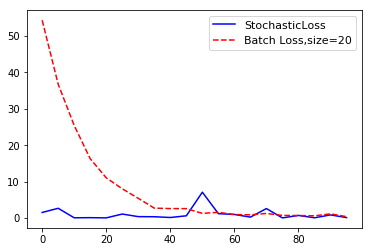

In [67]:
plt.plot(range(0, 100, 5), loss_stochastic, 'b-', label='StochasticLoss')
plt.plot(range(0, 100, 5), loss_batch, 'r--', label='Batch Loss,size=20')
plt.legend(loc='upper right', prop={'size': 11})
plt.show()